Emotion detection using OpenCV and CCN model

Mounting Google drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing libraries

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers.legacy import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

Data Preprocessing
We will be rescaling imagaes for fater model training

In [8]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

Loading training data

In [9]:
# Preprocess all train images
train_generator = train_data_gen.flow_from_directory(
        '/content/drive/MyDrive/data/train_1',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 496 images belonging to 7 classes.


Loading testing data

In [10]:
# Preprocess all test images
validation_generator = validation_data_gen.flow_from_directory(
        '/content/drive/MyDrive/data/test_1',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 207 images belonging to 7 classes.


Creating model

In [11]:
emotion_model = Sequential()

Adding layers to model

In [12]:
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(100, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

compiling model

In [13]:
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

Training model

In [14]:
emotion_model_info = emotion_model.fit(
         train_generator,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1.9484 - accuracy: 0.1593

8/8 [==============================] - 9s 1s/step - loss: 1.9484 - accuracy: 0.1593 - val_loss: 1.9475 - val_accuracy: 0.1304
Epoch 2/50
8/8 [==============================] - 8s 882ms/step - loss: 1.9464 - accuracy: 0.1492
Epoch 3/50
8/8 [==============================] - 8s 930ms/step - loss: 1.9469 - accuracy: 0.1492
Epoch 4/50
8/8 [==============================] - 7s 744ms/step - loss: 1.9467 - accuracy: 0.1411
Epoch 5/50
8/8 [==============================] - 7s 933ms/step - loss: 1.9422 - accuracy: 0.1431
Epoch 6/50
8/8 [==============================] - 6s 743ms/step - loss: 1.9429 - accuracy: 0.1411
Epoch 7/50
8/8 [==============================] - 8s 965ms/step - loss: 1.9412 - accuracy: 0.1472
Epoch 8/50
8/8 [==============================] - 7s 843ms/step - loss: 1.9399 - accuracy: 0.1492
Epoch 9/50
8/8 [==============================] - 7s 719ms/step - loss: 1.9414 - accuracy: 0.1673
Epoch 10/50
8/8 [==============================] - 8s 969ms/step - loss: 1.9472 - accuracy

Prediction

In [15]:
predictions = emotion_model.predict(validation_generator)

4/4 [==============================] - 1s 192ms/step


In [16]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [17]:
# see predictions
for result in predictions:
     max_index = int(np.argmax(result))
     print(emotion_dict[max_index])

Angry
Surprised
Neutral
Sad
Disgusted
Surprised
Happy
Happy
Sad
Sad
Sad
Surprised
Surprised
Angry
Happy
Surprised
Surprised
Surprised
Surprised
Disgusted
Disgusted
Surprised
Sad
Happy
Happy
Angry
Surprised
Sad
Sad
Sad
Angry
Sad
Angry
Angry
Angry
Disgusted
Sad
Neutral
Happy
Angry
Happy
Angry
Angry
Angry
Angry
Neutral
Sad
Surprised
Neutral
Sad
Disgusted
Sad
Angry
Disgusted
Happy
Neutral
Sad
Happy
Surprised
Sad
Sad
Happy
Neutral
Sad
Surprised
Neutral
Surprised
Happy
Sad
Sad
Sad
Happy
Sad
Sad
Neutral
Happy
Happy
Disgusted
Happy
Sad
Angry
Sad
Neutral
Happy
Surprised
Sad
Surprised
Sad
Happy
Surprised
Surprised
Happy
Surprised
Happy
Sad
Surprised
Happy
Happy
Disgusted
Surprised
Angry
Surprised
Surprised
Sad
Disgusted
Disgusted
Angry
Angry
Happy
Surprised
Surprised
Fearful
Happy
Disgusted
Happy
Happy
Sad
Fearful
Surprised
Sad
Surprised
Sad
Sad
Surprised
Surprised
Surprised
Angry
Surprised
Surprised
Surprised
Neutral
Disgusted
Sad
Happy
Sad
Surprised
Disgusted
Happy
Happy
Disgusted
Angry
Surpri

Confusion Matrix

In [18]:
c_matrix = confusion_matrix(validation_generator.classes, predictions.argmax(axis=1))
print(c_matrix)

[[ 3  3  0  5  1  8 10]
 [10  3  0  4  4  7  2]
 [ 1  1  0  8  4 11  5]
 [ 3  4  1  8  0  3  8]
 [ 2  3  1  4  3  6 11]
 [ 5  6  0  6  3  4  6]
 [ 0  8  0  3  1  6 12]]


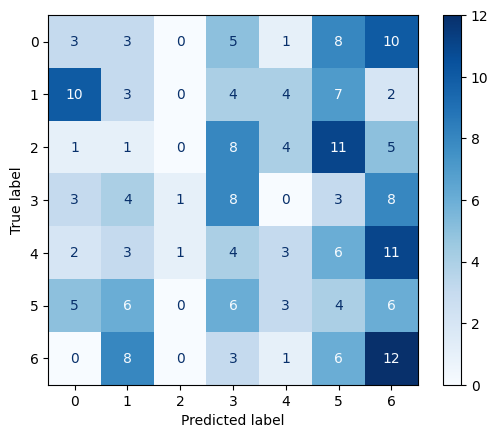

In [19]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

Classification Report

In [20]:
print(classification_report(validation_generator.classes, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.12      0.10      0.11        30
           1       0.11      0.10      0.10        30
           2       0.00      0.00      0.00        30
           3       0.21      0.30      0.25        27
           4       0.19      0.10      0.13        30
           5       0.09      0.13      0.11        30
           6       0.22      0.40      0.29        30

    accuracy                           0.16       207
   macro avg       0.13      0.16      0.14       207
weighted avg       0.13      0.16      0.14       207



Testing Image

In [21]:
img = cv2.imread("/content/download.jpg",cv2.IMREAD_GRAYSCALE)

In [22]:
np_img = np.expand_dims(np.expand_dims(cv2.resize(img, (48, 48)), -1), 0)

In [23]:
outputCNN = emotion_model.predict(np_img)

1/1 [==============================] - 0s 119ms/step


In [24]:
max_index = int(np.argmax(outputCNN))
print(emotion_dict[max_index])

Angry


OpenCV Web cam Image Capture

In [25]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

In [26]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [27]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [30]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

    # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(img, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
1/1 [==============================] - 0s 33ms/step
Saved to photo.jpg


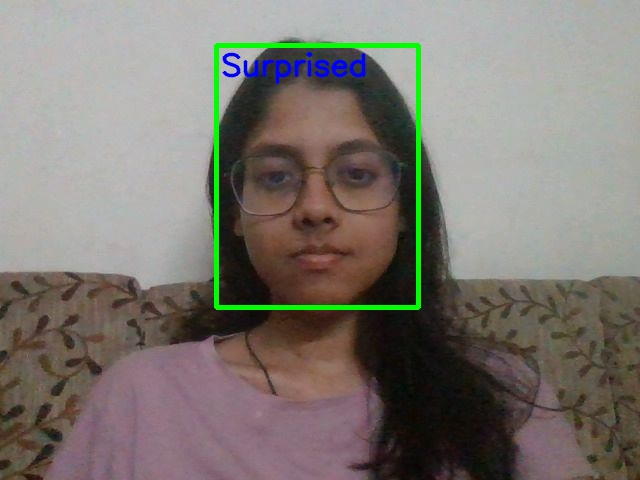

In [62]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

OpenCV Web Cam Video Capture

In [36]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [42]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    for (x, y, w, h) in faces:
        bbox_array = cv2.rectangle(bbox_array, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(bbox_array, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 30ms/step
